# SpaceX

* Explore the SpaceX V3 API:

    * [GitHub](https://github.com/r-spacex/SpaceX-API)

    * [API Documentation](https://documenter.getpostman.com/view/2025350/RWaEzAiG#e232e64a-58a2-4bc0-af42-eb20499425cc)

* Once you understand the structure of the API and its endpoint, choose one of the endpoints and do the following:

  * Retrieve and print the JSON for _all_ of the records from your chosen endpoint.

  * Retrieve and print the JSON for the a _specific_ record from your chosen endpoint.

In [1]:
# Dependencies
import requests
import json
# URL for GET requests to retrieve vehicle data
url = "https://api.spacexdata.com/v2/launchpads"
# Pretty print JSON for all launchpads
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "attempted_launches": 0,
        "details": "SpaceX original west coast launch pad for Falcon 1. Performed a static fire but was never used for a launch and abandoned due to scheduling conflicts.",
        "full_name": "Vandenberg Air Force Base Space Launch Complex 3W",
        "id": "vafb_slc_3w",
        "location": {
            "latitude": 34.6440904,
            "longitude": -120.5931438,
            "name": "Vandenberg Air Force Base",
            "region": "California"
        },
        "name": "VAFB SLC 3W",
        "padid": 5,
        "status": "retired",
        "successful_launches": 0,
        "vehicles_launched": [
            "Falcon 1"
        ],
        "wikipedia": "https://en.wikipedia.org/wiki/Vandenberg_AFB_Space_Launch_Complex_3"
    },
    {
        "attempted_launches": 52,
        "details": "SpaceX primary Falcon 9 launch pad, where all east coast Falcon 9s launched prior to the AMOS-6 anomaly. Initially used to launch Titan rockets for Lockhe

In [2]:
# Pretty print JSON for a specific launchpad
response = requests.get(url + "/ksc_lc_39a").json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "attempted_launches": 21,
    "details": "NASA historic launch pad that launched most of the Saturn V and Space Shuttle missions. Initially for Falcon Heavy launches, it is now launching all of SpaceX east coast missions due to the damage from the AMOS-6 anomaly. After SLC-40 repairs are complete, it will be upgraded to support Falcon Heavy, a process which will take about two months. In the future it will launch commercial crew missions and the Interplanetary Transport System.",
    "full_name": "Kennedy Space Center Historic Launch Complex 39A",
    "id": "ksc_lc_39a",
    "location": {
        "latitude": 28.6080585,
        "longitude": -80.6039558,
        "name": "Cape Canaveral",
        "region": "Florida"
    },
    "name": "KSC LC 39A",
    "padid": 4,
    "status": "active",
    "successful_launches": 21,
    "vehicles_launched": [
        "Falcon 9",
        "Falcon Heavy"
    ],
    "wikipedia": "https://en.wikipedia.org/wiki/Kennedy_Space_Center_Launch_Complex_39#La

# Number Facts API
* Using the Numbers API, create an application that takes in a user's inputs and returns a number fact based upon it.

    * [Numbers API](http://numbersapi.com/)

In [10]:
# Dependencies
import requests
import json
# Base URL for GET requests to retrieve number/date facts
url = "http://numbersapi.com/"
# Ask the user what kind of data they would like to search for
question = ("What type of data would you like to search for? "
            "[Trivia, Math, Date, or Year] ")
kind_of_search = input(question)
# If the kind of search is "date" take in two numbers
if(kind_of_search.lower() == "date"):
  # Collect the month to search for
  month = input("What month (1-12) would you like to search for? ")
  # Collect the day to search for
  day = input("What day would you like to search for? ")
  # Make an API call to the "date" API and convert response object to JSON
  response = requests.get(f"{url}{month}/{day}/{kind_of_search.lower()}?json").json()
  # Print the fact stored within the response
  print(response["text"])

# If the kind of search is anything but "date" then take one number
else:
  # Collect the number to search for
  number = input("What number would you like to search for? ")
  # Make an API call to the API and convert response object to JSON
  response = requests.get(url + number + "/" +  kind_of_search.lower()+ "?json").json()
  # Print the fact stored within the response
  print(response["text"])

What type of data would you like to search for? [Trivia, Math, Date, or Year] Date
What month (1-12) would you like to search for? 6
What day would you like to search for? 2
June 2nd is the day in 1876 that Hristo Botev, a national revolutionary of Bulgaria, is killed in Stara Planina.


# OMDb API
  * Read the OMDb documentation, and make a few API calls to
    get some information about your favorite movie: <http://www.omdbapi.com/>


In [2]:
import requests
import json
# New Dependency! Use this to pretty print the JSON
# https://docs.python.org/3/library/pprint.html
from pprint import pprint
# The ?t= is a query param for the t-itle of the movie we want to search for.
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=trilogy"
# Performing a GET request similar to the one we executed
# earlier
response = requests.get(url + "" + api_key)
print(response.url)

http://www.omdbapi.com/?t=&apikey=trilogy


In [3]:
# Converting the response to JSON, and printing the result.
data = response.json()
pprint(data)

{'Error': 'Something went wrong.', 'Response': 'False'}


In [31]:
# Print a few keys from the response JSON.
print(f"Movie was directed by {data['Director']}.")
print(f"Movie was released in {data['Country']}.")

Movie was directed by Ryan Coogler.
Movie was released in USA.


In [4]:
# Iterative Request
url = "http://www.omdbapi.com/?apikey=trilogy&t="
movies = ["The Longest Ride","Life is beautiful","The Intern"]
responses = [];

for movie in movies:
    movie_data = requests.get(url + movie).json()
    responses.append(movie_data)
    print(f'The duration of {movie} is {movie_data["Runtime"]}')
    print(f'The director of {movie} is {movie_data["Director"]}')

The duration of The Longest Ride is 123 min
The director of The Longest Ride is George Tillman Jr.
The duration of Life is beautiful is 116 min
The director of Life is beautiful is Roberto Benigni
The duration of The Intern is 121 min
The director of The Intern is Nancy Meyers


In [5]:
# Run 'responses' to see all the info
#responses

# New York Times 

* Search articles published within a range of dates related with Obama

* Build your query URL, and save it to a variable.

* Retrieve your list of articles with a GET request.

* Store each article in the response inside of a list.

* Print a `snippet` from each article.

In [12]:
# Dependencies
import requests
from api_keys import NYT_api_key
import time
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
# Store a search term
query = "obama"
# Search for articles published between a begin and end date
begin_date = "20160101"
end_date = "20160130"

query_url = f"{url}api-key={NYT_api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"

In [13]:
# Retrieve articles
articles = requests.get(query_url).json()
articles_list = [article for article in articles["response"]["docs"]]
for article in articles_list:
    print(f'A snippet from the article: {article["snippet"]}')

A snippet from the article: I will not campaign for, vote for or support any candidate, even in my own party, who does not support common-sense gun reform.
A snippet from the article: In presidential elections, opposites attract.
A snippet from the article: To function properly, the clemency process needs to be removed from the grasp of the Justice Department.
A snippet from the article: President Obama hosted the emir of Qatar, Sheikh Tamim bin Hamad al-Thani, on Tuesday, and both said they were committed to defeating the Islamic State and other terrorist organizations.
A snippet from the article: President Obama signed a presidential memorandum creating a White House task force on cancer.
A snippet from the article: “We must confront the reality that around the world anti-Semitism is on the rise,” the president urged at an event to posthumously honor individuals who protected Jews during the Holocaust.
A snippet from the article: The president seeks $4 billion to help states expand i

In [15]:
# Emply list for articles
articles_list = []
# loop through pages 0-2
for page in range(0, 3):
    query_url = f"{url}api-key={NYT_api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"
    # create query with page number
    query_url = f"{query_url}&page={str(page)}"
    articles = requests.get(query_url).json()
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    # loop through the response and append each article to the list
    for article in articles["response"]["docs"]:
        articles_list.append(article)

In [16]:
for article in articles_list:
    print(article)

{'abstract': 'I will not campaign for, vote for or support any candidate, even in my own party, who does not support common-sense gun reform.', 'web_url': 'https://www.nytimes.com/2016/01/08/opinion/president-barack-obama-guns-are-our-shared-responsibility.html', 'snippet': 'I will not campaign for, vote for or support any candidate, even in my own party, who does not support common-sense gun reform.', 'lead_paragraph': 'THE epidemic of gun violence in our country is a crisis. Gun deaths and injuries constitute one of the greatest threats to public health and to the safety of the American people. Every year, more than 30,000 Americans have their lives cut short by guns. Suicides. Domestic violence. Gang shootouts. Accidents. Hundreds of thousands of Americans have lost brothers and sisters, or buried their own children. We’re the only advanced nation on earth that sees this kind of mass violence with this frequency.', 'print_section': 'A', 'print_page': '23', 'source': 'The New York Ti

# New York Times 2
* Make a list of articles of the New York Times related with Granola


In [4]:
# Dependencies
import requests
from pprint import pprint
from api_keys import NYT_api_key
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"

In [10]:
# Search for articles that mention granola
query = "granola"
# Build query URL
query_url = url + "api-key=" + NYT_api_key + "&q=" + query
# Request articles
articles = requests.get(query_url).json()
# The "response" property in articles contains the actual articles
# list comprehension.
articles_list = [article for article in articles["response"]["docs"]]
# Print the web_url of each stored article
print("Your Reading List")
for article in articles_list:
    print(article["web_url"])

Your Reading List
https://cooking.nytimes.com/recipes/1014414-granola
https://www.nytimes.com/2012/03/25/magazine/who-made-that-granola.html
https://cooking.nytimes.com/recipes/1014040-granola
https://www.nytimes.com/2016/05/11/dining/granola-recipe-clusters-video.html
https://cooking.nytimes.com/recipes/1020980-strawberry-granola
https://cooking.nytimes.com/recipes/1822-granola-muffins
https://cooking.nytimes.com/recipes/1019514-granola-bites
https://www.nytimes.com/1999/01/24/nyregion/they-stand-by-their-granola.html
https://www.nytimes.com/2000/11/22/living/granola.html
https://cooking.nytimes.com/recipes/1012921-granola-muffins


# YouTube Json
* Load the provided JSON
* Retrieve the video's title
* Retrieve the video's rating
* Retrieve the link to the video's thumbnail
* Retrieve the number of views this video has

In [7]:
# Dependencies
import json
import os

# Load JSON
filepath = os.path.join("Resources", "youtube_response.json")
with open(filepath) as jsonfile:
    json_data = json.load(jsonfile)

In [38]:
#json_data 

In [37]:
print(f'Title of the video: {json_data["data"]["items"][0]["title"]}')
print(f'Rating of the video: {json_data["data"]["items"][0]["rating"]}')
print(f'Thumbnail link of the video: {json_data["data"]["items"][0]["thumbnail"]["default"]}')
print(f'Number of views: {json_data["data"]["items"][0]["viewCount"]}')

Title of the video: Google Developers Day US - Maps API Introduction
Rating of the video: 4.63
Thumbnail link of the video: http://i.ytimg.com/vi/hYB0mn5zh2c/default.jpg
Number of views: 220101


# Weather API

In [40]:
from api_keys import weather_api_key
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [41]:
 # Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.66, 'feels_like': 274.71, 'temp_min': 279.82, 'temp_max': 281.48, 'pressure': 1023, 'humidity': 50}, 'wind': {'speed': 5.23, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1589230348, 'sys': {'type': 3, 'id': 268730, 'country': 'GB', 'sunrise': 1589170456, 'sunset': 1589225975}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}.


### Bujumbura
* Retrieve the current temperature in Bujumbura from the JSON response.
* Print the temperature to the console.
* Augment your code to report the temperature in both Fahrenheit and Celsius.

In [47]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Bujumbura"
units = "metric" # To call de temp in celsius
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
bujumbura_response = requests.get(query_url)
bujumbura_json = bujumbura_response.json()
# Print temperature
print(f'The temperature in Bujumbura is: {bujumbura_json["main"]["temp"]}C')

The temperature in Bujumbura is: 22.51C


In [45]:
units = ["metric", "imperial"] #Imperial for Farenheit
temperatures = []

# loop throught the list of units and append them to temperatures list
for unit in units:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    temperature = weather_json["main"]["temp"]
    temperatures.append(temperature)
# Report temperatures by accessing each element in the list
print(f"The temperature in Bujumbura is {temperatures[0]}C or {temperatures[1]}F.")

The temperature in Bujumbura is 22.51C or 72.52F.


### Cities
* Make a list of cities
* Save latitude and temperature of each city
* Create a Data Frame with the info
* Plot results

In [51]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
cities = ["Paris", "London", "Oslo", "Beijing","Munich"]
lat = []
temp = []
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 48.14]
The temperature information received is: [9.38, 7.06, 2.45, 15.23, 3.41]


In [52]:
 # Data frame from cities, lat, and temp
weather_dict = {"city": cities, "lat": lat,"temp": temp}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp
0,Paris,48.85,9.38
1,London,51.51,7.06
2,Oslo,59.91,2.45
3,Beijing,39.91,15.23
4,Munich,48.14,3.41


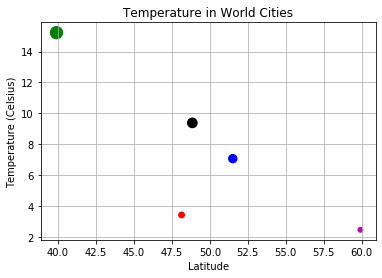

In [102]:
 # Build a scatter plot 
colors = ['k','b','m','g','r']
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o",color=colors,s=weather_data["temp"]*10)
# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()